<a href="https://colab.research.google.com/github/kibbm/ML-Tensorflow/blob/master/ch2_teenage_mental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 서울시 청소년 정신건강 분석
---
*   데이터: https://data.seoul.go.kr/  엑셀데이터
*   코드 참고: 누구나 python 너도 데이터 가지고 놀수 있어(itple) 
*   코드 명: ch2_teenage_mental.ipynb
*   install모듈 : pandas, matplotlib, xlrd 

In [1]:
pip install xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd

df = pd.read_excel("/content/sample_data/teenage_mental.xlsx", header=1, usecols="B:J")
df.head()

/usr/local/lib/python3.8/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,스트레스 인지율,우울감 경험률,자살 생각률,스트레스 인지율.1,우울감 경험률.1,자살 생각률.1,스트레스 인지율.2,우울감 경험률.2,자살 생각률.2
0,46.7,30.3,22.5,40.5,27.0,17.8,53.6,33.9,27.7
1,47.7,42.5,24.1,41.7,38.2,19.2,54.5,47.2,29.5
2,48.1,42.8,24.6,43.2,37.6,20.6,53.7,48.6,29.0
3,44.5,40.5,20.1,40.1,35.7,16.7,49.4,45.8,23.9
4,43.4,39.2,19.9,37.7,33.4,15.8,49.8,45.6,24.4


In [3]:
df.describe()

,스트레스 인지율,우울감 경험률,자살 생각률,스트레스 인지율.1,우울감 경험률.1,자살 생각률.1,스트레스 인지율.2,우울감 경험률.2,자살 생각률.2
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,42.047059,32.805882,17.723529,35.688235,28.023529,14.252941,48.964706,37.976471,21.517647
std,3.735492,5.917080,4.163612,4.071376,5.854862,3.493229,3.815420,6.144055,5.017001
min,35.100000,25.400000,11.200000,29.800000,21.200000,8.800000,40.800000,29.900000,13.800000
25%,39.000000,28.000000,14.200000,32.200000,22.900000,11.100000,46.700000,33.600000,17.700000
50%,42.100000,30.300000,18.600000,34.600000,26.800000,14.400000,49.700000,35.400000,23.200000
75%,44.500000,39.200000,20.700000,38.700000,33.400000,16.700000,51.500000,44.000000,24.900000
max,48.100000,42.800000,24.600000,43.200000,38.200000,20.600000,54.500000,48.600000,29.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   스트레스 인지율    17 non-null     float64
 1   우울감 경험률     17 non-null     float64
 2   자살 생각률      17 non-null     float64
 3   스트레스 인지율.1  17 non-null     float64
 4   우울감 경험률.1   17 non-null     float64
 5   자살 생각률.1    17 non-null     float64
 6   스트레스 인지율.2  17 non-null     float64
 7   우울감 경험률.2   17 non-null     float64
 8   자살 생각률.2    17 non-null     float64
dtypes: float64(9)
memory usage: 1.3 KB


#1.데이터 준비: 서울시 10대의 정신건강에 대한 통계자료 저장!

In [3]:
#step1 : 서울시 10대의 정신건강에 대한 통계자료 저장!
import pandas as pd

col_names = ['스트레스', '우울감경험률', '자살생각률', 
             '스트레스남학생', '우울남학생', '자살남학생',
             '스트레스여학생', '우울여학생', '자살여학생']

raw_df = pd.read_excel("/content/sample_data/teenage_mental.xlsx", 
                   header=1, 
                   usecols="B:J", 
                   names=col_names)
raw_df.head()

/usr/local/lib/python3.8/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,스트레스,우울감경험률,자살생각률,스트레스남학생,우울남학생,자살남학생,스트레스여학생,우울여학생,자살여학생
0,46.7,30.3,22.5,40.5,27.0,17.8,53.6,33.9,27.7
1,47.7,42.5,24.1,41.7,38.2,19.2,54.5,47.2,29.5
2,48.1,42.8,24.6,43.2,37.6,20.6,53.7,48.6,29.0
3,44.5,40.5,20.1,40.1,35.7,16.7,49.4,45.8,23.9
4,43.4,39.2,19.9,37.7,33.4,15.8,49.8,45.6,24.4


#2. 데이터 추출: "스트레스를 받은 적이 있는가?"

In [1]:
#2. 파이차트 시각화: "스트레스를 받은 적이 있는가?"

In [4]:
#step1: col_names적용
col_names = ['스트레스', '우울감경험률', '자살생각률', 
             '스트레스남학생', '우울남학생', '자살남학생',
             '스트레스여학생', '우울여학생', '자살여학생']

raw_data = pd.read_excel("/content/sample_data/teenage_mental_2018.xlsx", #2018년 자료만 pandas로 뽑을지 몰라 데이터를 변경했다;;
                   header=1, usecols="B:J", names=col_names) 
raw_data       

,스트레스,우울감경험률,자살생각률,스트레스남학생,우울남학생,자살남학생,스트레스여학생,우울여학생,자살여학생
0,42.7,29.6,15.4,34.5,24.2,11.8,51.5,35.4,19.2


In [5]:
#step2: "예" 응답률이 데이터가 있다면, "아니오"데이터 생성 필요
raw_data.loc[1] = 100 - raw_data.loc[0]
raw_data

,스트레스,우울감경험률,자살생각률,스트레스남학생,우울남학생,자살남학생,스트레스여학생,우울여학생,자살여학생
0,42.7,29.6,15.4,34.5,24.2,11.8,51.5,35.4,19.2
1,57.3,70.4,84.6,65.5,75.8,88.2,48.5,64.6,80.8


In [6]:
#step3: 응답("그렇다"/"아니다") 컬럼 추가
raw_data['응답'] = ['그렇다', '아니다']
raw_data

,스트레스,우울감경험률,자살생각률,스트레스남학생,우울남학생,자살남학생,스트레스여학생,우울여학생,자살여학생,응답
0,42.7,29.6,15.4,34.5,24.2,11.8,51.5,35.4,19.2,그렇다
1,57.3,70.4,84.6,65.5,75.8,88.2,48.5,64.6,80.8,아니다


In [7]:
#step4: 컬럼명 교체..set_index
#                    drop옵션: 인덱스를 해제하고 남은 데이터를 컬럼으로 사용할 것인지 아닌지 결정
#                    inplace옵션: raw_data의 내용을 갱신할 것인지 아닌지 결정함.
raw_data.set_index('응답', drop=True, inplace=True)
raw_data

,스트레스,우울감경험률,자살생각률,스트레스남학생,우울남학생,자살남학생,스트레스여학생,우울여학생,자살여학생
응답,,,,,,,,,
그렇다,42.7,29.6,15.4,34.5,24.2,11.8,51.5,35.4,19.2
아니다,57.3,70.4,84.6,65.5,75.8,88.2,48.5,64.6,80.8


#3. 시각화 (파이차트): "스트레스를 받은 적이 있는가?"

In [8]:
raw_data['스트레스']

응답
그렇다    42.7
아니다    57.3
Name: 스트레스, dtype: float64

In [9]:
#step3-1: 한글 폰트 설치
import matplotlib as mpl
import matplotlib.pyplot as plt
!apt -qq -y install fonts-nanum                             # 한글 폰트 설치
# 해당 폰트가 기본 폰트가 되도록 설정
import matplotlib.font_manager as fm                        # 한글 폰트 경로 설정
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname = fontpath)#, size = 9)
plt.rc('font', family = 'NanumBarunGothic')                 # 코랩의 한글 폰트를 '나눔바른고딕'으로 설정
mpl.font_manager._rebuild( )                                # 폰트 설정 관련 리빌드

fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.


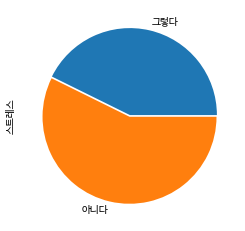

In [12]:
#step3-2: 파이차트..pie()
#                   explode옵션: 그래프의 항목 사이를 원점으로부터 떨어뜨려 줌.

import matplotlib.pyplot as plt

#raw_data['스트레스'].plot.pie()
raw_data['스트레스'].plot.pie(explode=[0, 0.02]) #

Text(0.5, 1.0, '자살을 고민한 적 있다')

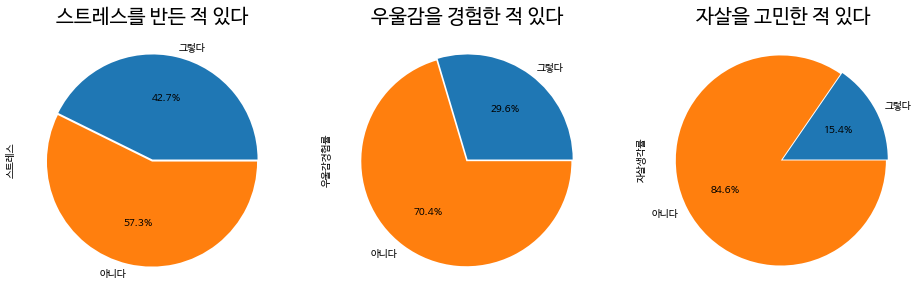

In [22]:
#step3-3: 원하는 여러개의 pie차트화...subplots
#                                     
f, ax = plt.subplots(1, 3, figsize=(16, 8)) #1행 3열로 배치, 그림 크기 설정

raw_data['스트레스'].plot.pie(explode=[0, 0.02], ax=ax[0], autopct='%1.1f%%') #explode:떨어뜨리기, ax로 위치, autopct는 라벨값 표시
ax[0].set_title('스트레스를 반든 적 있다', fontsize=20)                       #ax[0].제목 설정, fontsize로 폰트크기 설정

raw_data['우울감경험률'].plot.pie(explode=[0, 0.02], ax=ax[1], autopct='%1.1f%%')
ax[1].set_title('우울감을 경험한 적 있다', fontsize=20)

raw_data['자살생각률'].plot.pie(explode=[0, 0.02], ax=ax[2], autopct='%1.1f%%')
ax[2].set_title('자살을 고민한 적 있다', fontsize=20)